## Gas Usage Analysis per Block

How loaded is the ethereum mainnet measured on the ratio between the gas used and the gas limit.

In [1]:
from web3 import Web3
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
plt = plt.plot

In [2]:
w3 = Web3(Web3.HTTPProvider('https://mainnet.infura.io/v3/786a7764b8234b06b4cd6764a1646a17'))
w3.isConnected()

True

In [3]:
n_blocks = w3.eth.get_block('latest')['number']; n_blocks

12084786

In [4]:
EVERY_N_BLOCK = 10_000

blocks = [i for i in range(n_blocks, 0, -EVERY_N_BLOCK)]; len(blocks)

1209

In [5]:
# can take a little bit
gas_ratios = []
for i in range(n_blocks, 0, -EVERY_N_BLOCK):
    block = w3.eth.get_block(i)
    gas_ratio = block['gasUsed']/block['gasLimit']
    gas_ratios.append(gas_ratio)

#### There are alot of blocks with 0 gas used. Very interesting analysis on why this happens here: https://medium.com/@ASvanevik/why-all-these-empty-ethereum-blocks-666acbbf002. Other than that almost all blocks are full with transactions that consume almost all of the gas.

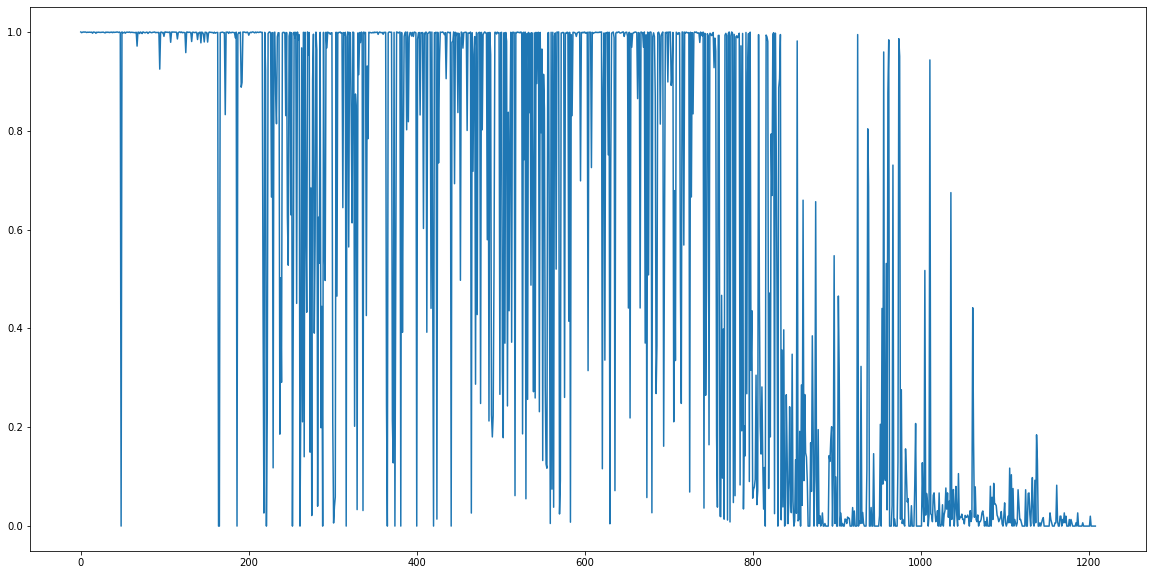

In [6]:
x = [i for i in range(len(blocks))]
plt(x, gas_ratios)